In [1]:
import os
from glob import glob 

import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
data_paths = glob('../../../Library/Mobile Documents/com~apple~CloudDocs/데이터사이언티스트/딥러닝:AI/Part3) 이미지 분석으로 배우는 tensorflow 2.0과 Pytorch/dataset/cifar/train/*.png')

In [12]:
path = data_paths[0]
path

'../../../Library/Mobile Documents/com~apple~CloudDocs/데이터사이언티스트/딥러닝:AI/Part3) 이미지 분석으로 배우는 tensorflow 2.0과 Pytorch/dataset/cifar/train/32270_deer.png'

In [13]:
# 파일을 불러오고 이미지로 전환
gfile = tf.io.read_file(path)
image = tf.io.decode_image(gfile, dtype=tf.float32)

image.shape

TensorShape([32, 32, 3])

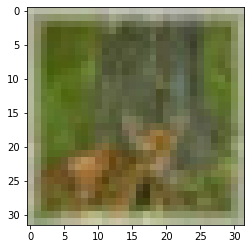

In [14]:
plt.imshow(image)
plt.show()

### 함수화하기

In [15]:
def read_image(path):
    # 파일을 불러오고 이미지로 전환
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile, dtype=tf.float32)
    return image

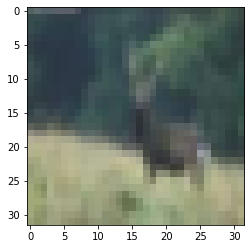

In [21]:
plt.imshow(read_image(data_paths[2]))
plt.show()

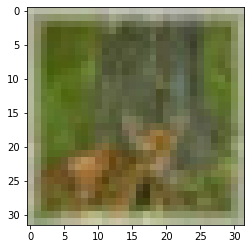

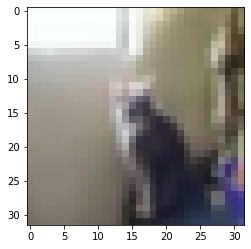

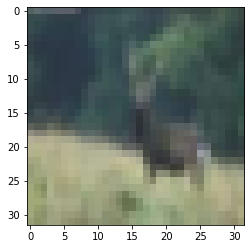

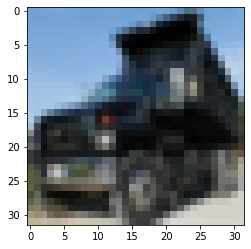

In [22]:
for i in range(4):
    plt.imshow(read_image(data_paths[i]))
    plt.show()

# Batch
- 전체 이미지 중 Batch사이즈 만큼 나누어서 모델에 넣기를 반복

## Images in List

In [23]:
batch_images = []

In [25]:
for path in data_paths[:8]:
    image = read_image(path)
    batch_images.append(image)

In [26]:
len(batch_images)

8

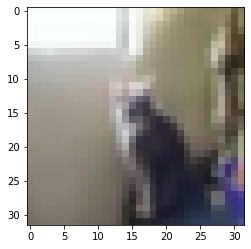

In [28]:
plt.imshow(batch_images[1])
plt.show()

In [29]:
# 배치 만들기1
np.array(batch_images).shape

(8, 32, 32, 3)

In [30]:
# 배치 만들기2
batch = tf.convert_to_tensor(batch_images)

In [31]:
batch.shape

TensorShape([8, 32, 32, 3])

# Batch Size

## 배치 만들기 함수

In [41]:
def make_batch(batch_images):
    batch_images = []

    for path in data_paths[:8]:
        image = read_image(path)
        # image = cv2.resize(image,(32,32))
        batch_images.append(image)

    return tf.convert_to_tensor(batch_images)

In [42]:
batch_images = make_batch(data_paths[:8])

In [43]:
batch_images.shape

TensorShape([8, 32, 32, 3])

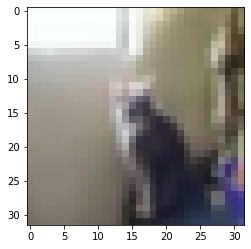

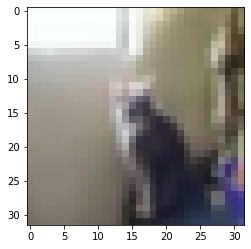

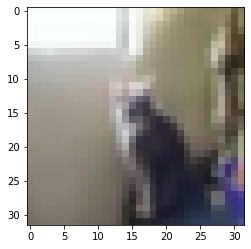

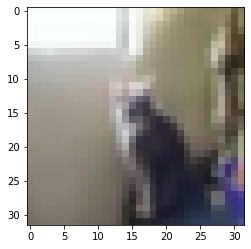

In [61]:
## 스텝 
batch_size = 16

for step in range(4):
    batch_image = make_batch(batch_images[step * batch_size : (step + 1) *  batch_size]) # [ : ]
    plt.imshow(batch_image[1])
    plt.show()